# **Telcom Customer Churn Prediction Project**

## Problem Statement

Customer attrition (a.k.a customer churn) is one of the biggest expenditures of any organization. If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives manifold. 

As a data scientist in the telecommunication industry, you are to help the organization in dealing with customer attrition by building a machine learning model to predict the likelihood of a customer leaving the company. This will in turn help the company minimize the rate at which customers leave and increase their customer retention rate. You are to do this based on historical data of customers. 

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

*	Customers who left within the last month – the column is called Churn

*	Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* Customer account information- how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
	
*   Demographic info about customers – gender, age range, and if they have partners and dependents

 




## Steps to Solving the Problem

* Data Importation and Cleaning
* Data Exploration and Feature Engineering
* Data Preprocessing for Modelling
* Model Validation
* Model Selection
* Feature Importance
* Conclusion

# Import Libraries

In [ ]:
import numpy as np  
import pandas as pd   
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
!pip install bioinfokit
from bioinfokit.analys import  stat
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression




from sklearn.metrics import accuracy_score
sns.set(style = 'white')


# Import Data

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Exploration

In [ ]:
#  displays the shape of the data
df.shape

(7043, 21)

The data has 7043 rows and 21 features or columns

In [ ]:
df.info() # displays the data types of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


It can be observed that the Total Charges is an object, instead of a float or int64. This shows that there is an error in that column. 

The column 'SeniorCitizen' has been defined as a numerical data. It must be converted to categorical data.

In [ ]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [ ]:
#Converting SeniorCitizen to categorical data type.
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1:'Yes',0:'No'})

In [ ]:
#dropping customerID column
df= df.drop(columns=['customerID'])

In [ ]:
#Checking the data to see if the changes from above has been effected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Target

Our target variables are the data column 'Churn'. An analysis has to be done to see the distribution of the variables

In [ ]:
# Class Distribution
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

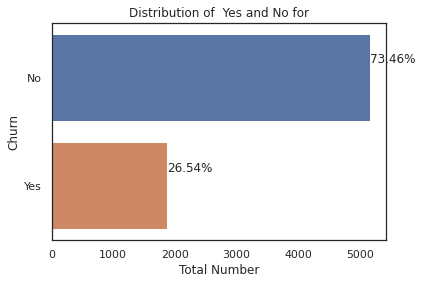

In [ ]:
def bar_plot(df,column):    
    ax = sns.countplot(y=column, data=df)
    plt.title('Distribution of  Yes and No for' )
    plt.xlabel('Total Number')

    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.03
        y = p.get_y() + p.get_height()/3
        ax.annotate(percentage, (x, y))
    plt.show()
bar_plot(df, "Churn")

It is evident that the data in 'Churn' has no missing values.

The distribution of Yes and No in Churn is heavily imbalanced, with a majority of data points to No.

There are 27% Yes and 73% No

## Numerical Predictors

There are three numerical values in this dataset. These are Tenure, Monthly Charges and Total Charges.

In [ ]:
def explore_num(df,x):
    print('Summary Statistics \n')
    print(df[x].apply([len,max,min,np.mean,np.median,]))
    print('='*30)
    print('Missing values {}'.format(df[x].isnull().sum()))
    print('='*30)
    plt.figure(figsize = (10,5))
    
    #plotting a box plot to depict median, outliers, etc
    meanpointprops = dict(marker='D', markeredgecolor='black',markerfacecolor='red')
    medianprops = dict(linestyle='-.', linewidth=5, color ='yellow')
    plt.subplot(1,2,1)
    plt.boxplot(df[x],vert=True,patch_artist=True,notch=True,\
                showmeans=True, meanprops=meanpointprops,medianprops=medianprops)
            
    
    
    plt.xlabel(df[x].name)
    plt.title('Boxplot for Numerical Variables')
    plt.show
    
    plt.subplot(1,2,2)
    plt.hist(df[x])
    plt.title('Histogram')
    plt.tight_layout()
    plt.show

Summary Statistics 

len       7043.000000
max         72.000000
min          0.000000
mean        32.371149
median      29.000000
Name: tenure, dtype: float64
Missing values 0


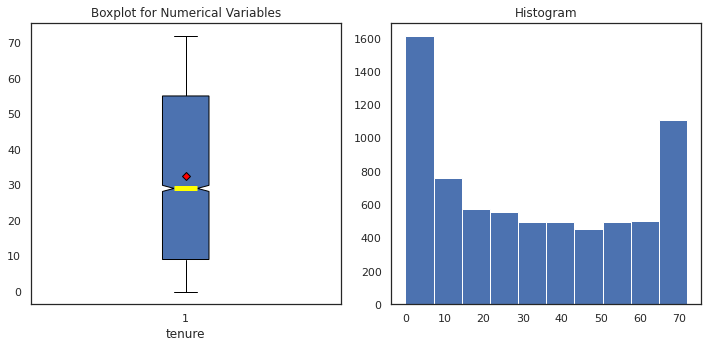

In [ ]:
explore_num(df,'tenure')

Summary Statistics 

len       7043.000000
max        118.750000
min         18.250000
mean        64.761692
median      70.350000
Name: MonthlyCharges, dtype: float64
Missing values 0


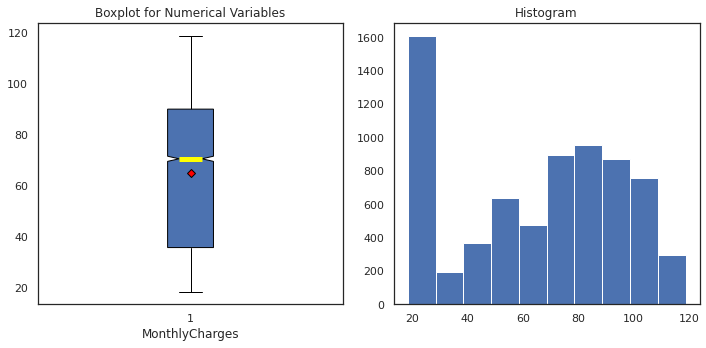

In [ ]:
explore_num(df,'MonthlyCharges')

Summary Statistics 

len       7043.000000
max       8684.800000
min         18.800000
mean      2283.300441
median    1397.475000
Name: TotalCharges, dtype: float64
Missing values 11


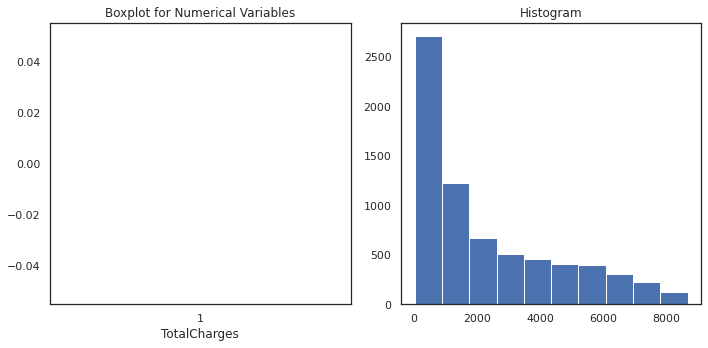

In [ ]:
explore_num(df,'TotalCharges')

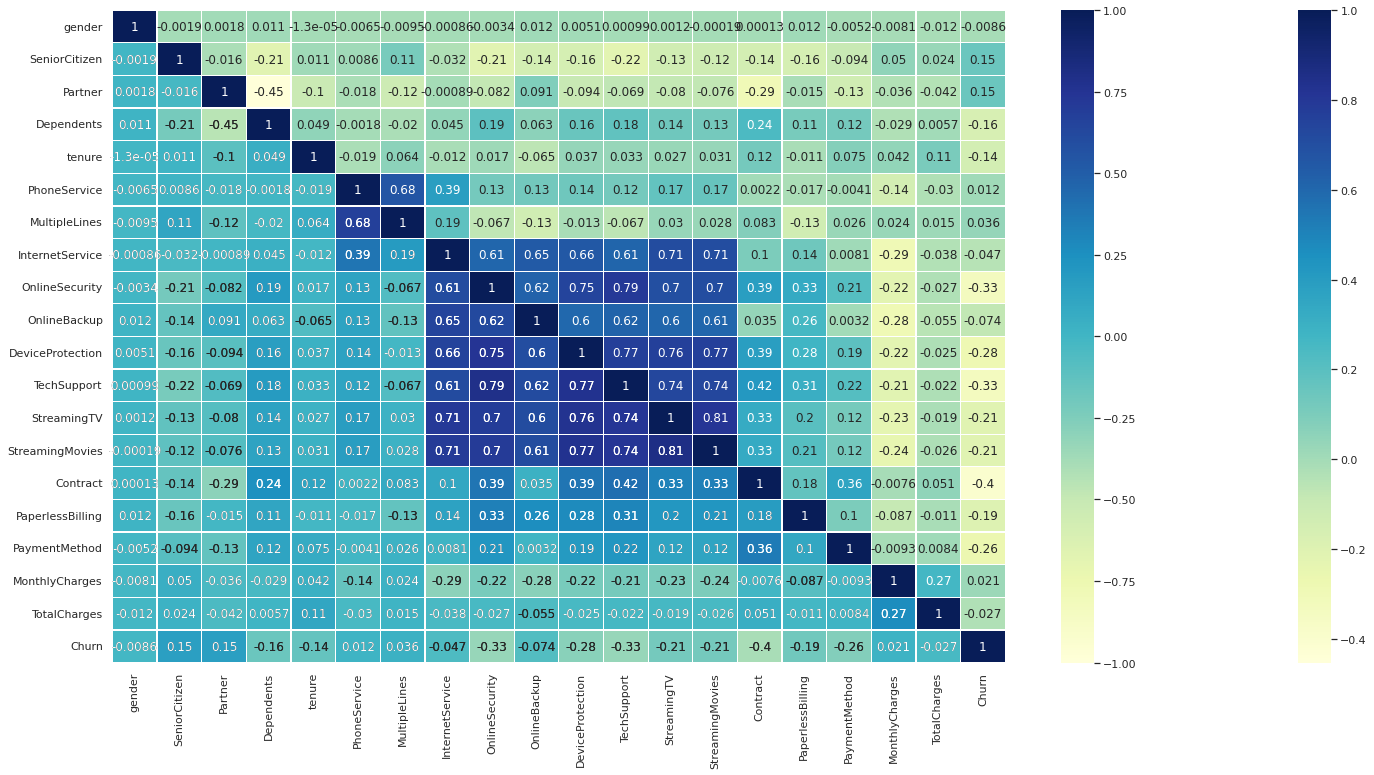

In [ ]:
plt.figure(figsize=(25,12))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(corr,annot=corr,cmap='YlGnBu',fmt='.2g')
mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='YlGnBu', vmin=-1, vmax=1)


According to the heat map above, there is multicolinearity between select columns.

The following columns have a colinearity above 70% with heach other :

Device Protection with Online Security

Tech Support with Online Security and Device Protection

StreamingTv with Internet Service,Online Security, Device Protection and Tech Support

StreamingMovies with InternetService,Online Security,DeviceProtection,Tech Support and StreamingTV

## Categorical Predictors

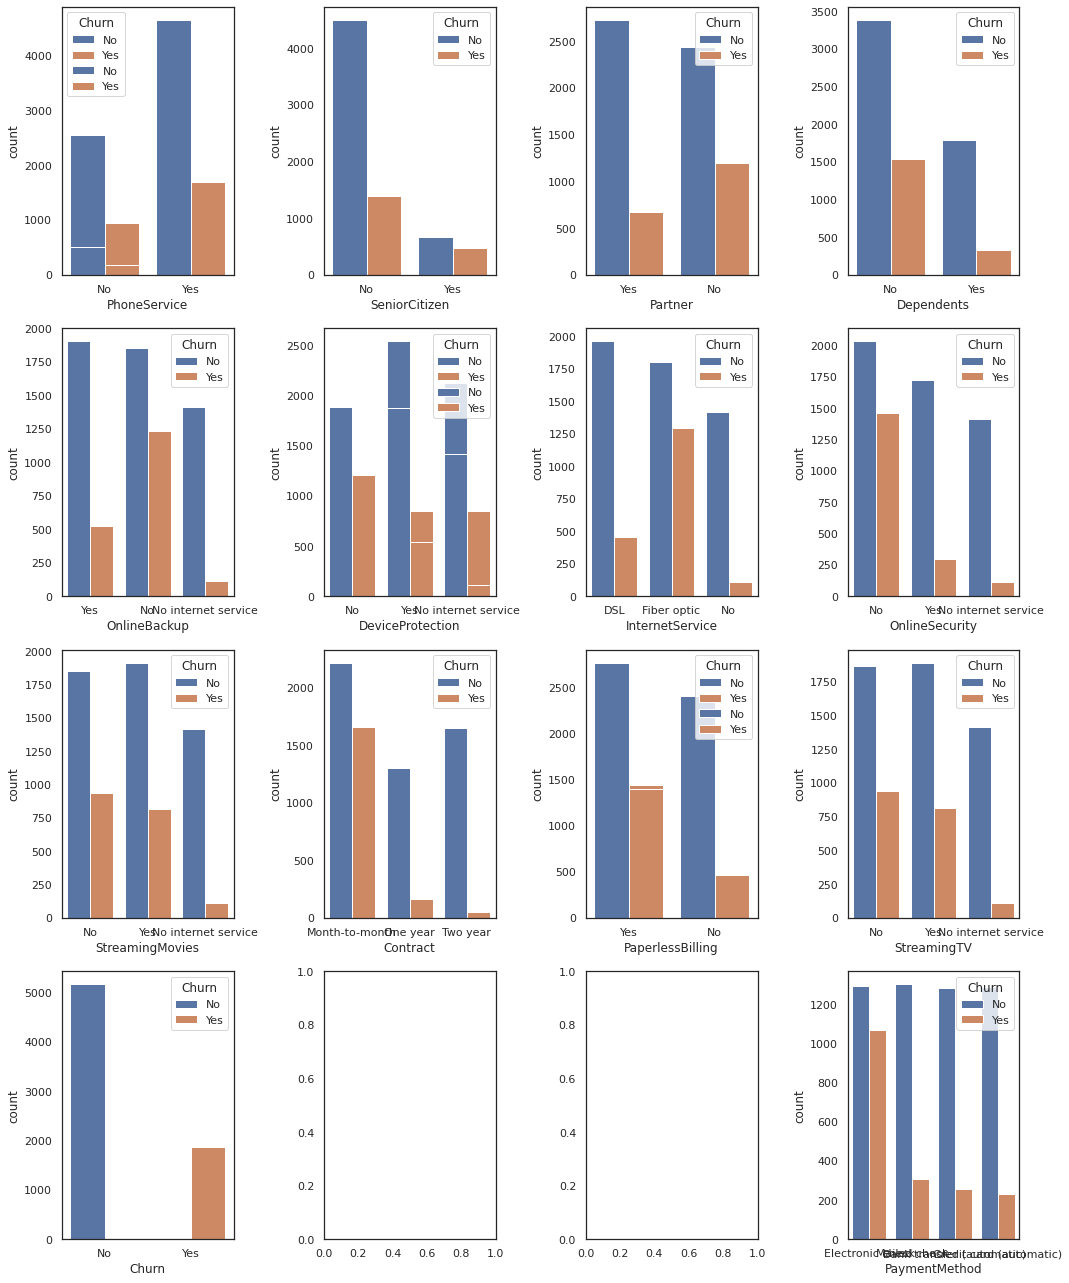

In [ ]:
#Churn distribution among the various categorical fields
cat_cols = df.select_dtypes(include=['object'])

fig,axes = plt.subplots(4,4,figsize=(15,18))
for index,cat_col in enumerate(cat_cols):
    row,col = index//5,index%4
    sns.countplot(x=cat_col,data=df, hue='Churn', ax=axes[row,col],)
    
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Employing the use of Chi Square to check for a significant relationship between each categorical value and Churn
def test_relation(df,x,y):
    tab = pd.crosstab(df[x],df[y])
    test = stat()
    test.chisq(df=tab)
    
    
    print(f'Null hypothesis: {x} and {y} are independent')
    print(f'Alternate hypothesis: {x} and {y} are dependent')
    print('Test results')
    print('-----------------------------------------------------')
    print('Observed frequency values \n')
    print(tab)
    
          
    print('-----------------------------------------------------')
    print(test.expected_df)
    print('-----------------------------------------------------')
    print(test.summary)


In [ ]:
test_relation(df,'Churn','gender')

Null hypothesis: Churn and gender are independent
Alternate hypothesis: Churn and gender are dependent
Test results
-----------------------------------------------------
Observed frequency values 

gender  Female  Male
Churn               
No        2549  2625
Yes        939   930
-----------------------------------------------------

Expected frequency counts

      Female     Male
--  --------  -------
 0   2562.39  2611.61
 1    925.61   943.39

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1      0.484083   0.486579
Log-likelihood     1      0.484068   0.486586



The P-value of 0.486579 is greater than alpha (0.05), therefore there is no significant relationship between 'gender' and 'Churn'


In [ ]:
test_relation(df,'Churn','SeniorCitizen')

Null hypothesis: Churn and SeniorCitizen are independent
Alternate hypothesis: Churn and SeniorCitizen are dependent
Test results
-----------------------------------------------------
Observed frequency values 

SeniorCitizen    No  Yes
Churn                   
No             4508  666
Yes            1393  476
-----------------------------------------------------

Expected frequency counts

         No      Yes
--  -------  -------
 0  4335.05  838.948
 1  1565.95  303.052

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       159.426  1.51007e-36
Log-likelihood     1       148.154  4.39013e-34



The P-value of 0.486579 is less than alpha (0.05), therefore there is a significant relationship between 'Churn' and 'SeniorCitizen'

In [ ]:
test_relation(df,'Churn','Partner')

Null hypothesis: Churn and Partner are independent
Alternate hypothesis: Churn and Partner are dependent
Test results
-----------------------------------------------------
Observed frequency values 

Partner    No   Yes
Churn              
No       2441  2733
Yes      1200   669
-----------------------------------------------------

Expected frequency counts

          No       Yes
--  --------  --------
 0  2674.79   2499.21
 1   966.212   902.788

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       158.733  2.13991e-36
Log-likelihood     1       160.64   8.20128e-37



The P-value of 2.13991e-36 is less than alpha (0.05), therefore there is a significant relationship between 'gender' and 'Partner'

In [ ]:
test_relation(df,'Churn','Dependents')

Null hypothesis: Churn and Dependents are independent
Alternate hypothesis: Churn and Dependents are dependent
Test results
-----------------------------------------------------
Observed frequency values 

Dependents    No   Yes
Churn                 
No          3390  1784
Yes         1543   326
-----------------------------------------------------

Expected frequency counts

         No      Yes
--  -------  -------
 0  3623.93  1550.07
 1  1309.07   559.93

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       189.129  4.92492e-43
Log-likelihood     1       202.874  4.92722e-46



The P-value of 4.92492e-43 is less than alpha (0.05), therefore there is significant relationship between 'Churn' and 'Dependents'

In [ ]:
test_relation(df,'Churn','PhoneService')

Null hypothesis: Churn and PhoneService are independent
Alternate hypothesis: Churn and PhoneService are dependent
Test results
-----------------------------------------------------
Observed frequency values 

PhoneService   No   Yes
Churn                  
No            512  4662
Yes           170  1699
-----------------------------------------------------

Expected frequency counts

         No      Yes
--  -------  -------
 0  501.018  4672.98
 1  180.982  1688.02

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1      0.915033   0.338783
Log-likelihood     1      0.925475   0.336041



The P-value of 0.338783 is greater than alpha (0.05), therefore there is no significant relationship between 'Churn' and 'PhoneService'

In [ ]:
test_relation(df,'Churn','MultipleLines')

Null hypothesis: Churn and MultipleLines are independent
Alternate hypothesis: Churn and MultipleLines are dependent
Test results
-----------------------------------------------------
Observed frequency values 

MultipleLines    No  No phone service   Yes
Churn                                      
No             2541               512  2121
Yes             849               170   850
-----------------------------------------------------

Expected frequency counts

          No    No phone service       Yes
--  --------  ------------------  --------
 0  2490.4               501.018  2182.59
 1   899.604             180.982   788.414

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square     P-value
--------------  ----  ------------  ----------
Pearson            2       11.3304  0.00346438
Log-likelihood     2       11.2866  0.00354111



The P-value of 0.00346438 is less than alpha (0.05), therefore there is a significant relationship between 'Churn' and 'MultipleLines'

In [ ]:
test_relation(df,'Churn','InternetService')

Null hypothesis: Churn and InternetService are independent
Alternate hypothesis: Churn and InternetService are dependent
Test results
-----------------------------------------------------
Observed frequency values 

InternetService   DSL  Fiber optic    No
Churn                                   
No               1962         1799  1413
Yes               459         1297   113
-----------------------------------------------------

Expected frequency counts

        DSL    Fiber optic        No
--  -------  -------------  --------
 0  1778.54       2274.41   1121.05
 1   642.46        821.585   404.954

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       732.31   9.57179e-160
Log-likelihood     2       782.818  1.03095e-170



The P-value of 9.57179e-160 is less than alpha (0.05), therefore there is a significant relationship between 'Churn' and 'SeniorCitizen'

In [ ]:
test_relation(df,'Churn','OnlineSecurity')

Null hypothesis: Churn and OnlineSecurity are independent
Alternate hypothesis: Churn and OnlineSecurity are dependent
Test results
-----------------------------------------------------
Observed frequency values 

OnlineSecurity    No  No internet service   Yes
Churn                                          
No              2037                 1413  1724
Yes             1461                  113   295
-----------------------------------------------------

Expected frequency counts

          No    No internet service       Yes
--  --------  ---------------------  --------
 0  2569.74                1121.05   1483.22
 1   928.264                404.954   535.782

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       849.999  2.66115e-185
Log-likelihood     2       911.044  1.47661e-198



The P-value of 2.66115e-185 is less than alpha (0.05), therefore there is a significant relationship between 'Churn' and 'OnlineSecurity'

In [ ]:
test_relation(df,'Churn','OnlineBackup')

Null hypothesis: Churn and OnlineBackup are independent
Alternate hypothesis: Churn and OnlineBackup are dependent
Test results
-----------------------------------------------------
Observed frequency values 

OnlineBackup    No  No internet service   Yes
Churn                                        
No            1855                 1413  1906
Yes           1233                  113   523
-----------------------------------------------------

Expected frequency counts

          No    No internet service       Yes
--  --------  ---------------------  --------
 0  2268.54                1121.05   1784.42
 1   819.462                404.954   644.583

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       601.813  2.07976e-131
Log-likelihood     2       659.117  7.49267e-144



The P-value of 0.486579 is less than alpha (0.05), therefore there is a significant relationship between 'Churn' and 'SeniorCitizen'

In [ ]:
test_relation(df,'Churn','DeviceProtection')

Null hypothesis: Churn and DeviceProtection are independent
Alternate hypothesis: Churn and DeviceProtection are dependent
Test results
-----------------------------------------------------
Observed frequency values 

DeviceProtection    No  No internet service   Yes
Churn                                            
No                1884                 1413  1877
Yes               1211                  113   545
-----------------------------------------------------

Expected frequency counts

         No    No internet service       Yes
--  -------  ---------------------  --------
 0  2273.68               1121.05   1779.27
 1   821.32                404.954   642.726

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       558.419  5.50522e-122
Log-likelihood     2       618.614  4.67484e-135



The P-value of 5.50522e-122 is less than alpha (0.05), therefore there is a significant relationship between 'Churn' and 'DeviceProtection'

In [ ]:
test_relation(df,'Churn','TechSupport')

Null hypothesis: Churn and TechSupport are independent
Alternate hypothesis: Churn and TechSupport are dependent
Test results
-----------------------------------------------------
Observed frequency values 

TechSupport    No  No internet service   Yes
Churn                                       
No           2027                 1413  1734
Yes          1446                  113   310
-----------------------------------------------------

Expected frequency counts

         No    No internet service       Yes
--  -------  ---------------------  --------
 0  2551.37               1121.05   1501.58
 1   921.63                404.954   542.416

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       828.197  1.44308e-180
Log-likelihood     2       887.714  1.71904e-193



The P-value of 1.44308e-180 is less than alpha (0.05), therefore there is a significant relationship between 'Churn' and 'TechSupport'

In [ ]:
test_relation(df,'Churn','StreamingTV')

Null hypothesis: Churn and StreamingTV are independent
Alternate hypothesis: Churn and StreamingTV are dependent
Test results
-----------------------------------------------------
Observed frequency values 

StreamingTV    No  No internet service   Yes
Churn                                       
No           1868                 1413  1893
Yes           942                  113   814
-----------------------------------------------------

Expected frequency counts

          No    No internet service       Yes
--  --------  ---------------------  --------
 0  2064.31                1121.05   1988.64
 1   745.689                404.954   718.356

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            2       374.204  5.52899e-82
Log-likelihood     2       449.456  2.52305e-98



The P-value of 5.52899e-82is less than alpha (0.05), therefore there is a significant relationship between 'Churn' and 'StreamingTV'

In [ ]:
test_relation(df,'Churn','StreamingMovies')

Null hypothesis: Churn and StreamingMovies are independent
Alternate hypothesis: Churn and StreamingMovies are dependent
Test results
-----------------------------------------------------
Observed frequency values 

StreamingMovies    No  No internet service   Yes
Churn                                           
No               1847                 1413  1914
Yes               938                  113   818
-----------------------------------------------------

Expected frequency counts

          No    No internet service      Yes
--  --------  ---------------------  -------
 0  2045.94                1121.05   2007.01
 1   739.055                404.954   724.99

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            2       375.661  2.66776e-82
Log-likelihood     2       450.765  1.31082e-98



The P-value of 2.66776e-82 is less than alpha (0.05), therefore there is a significant relationship between 'Churn' and 'StreamingMovies'

In [ ]:
test_relation(df,'Churn','Contract')

Null hypothesis: Churn and Contract are independent
Alternate hypothesis: Churn and Contract are dependent
Test results
-----------------------------------------------------
Observed frequency values 

Contract  Month-to-month  One year  Two year
Churn                                       
No                  2220      1307      1647
Yes                 1655       166        48
-----------------------------------------------------

Expected frequency counts

      Month-to-month    One year    Two year
--  ----------------  ----------  ----------
 0           2846.69     1082.11    1245.2
 1           1028.31      390.89     449.802

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       1184.6   5.86304e-258
Log-likelihood     2       1386.81  7.2127e-302



The P-value of 5.86304e-258 is less than alpha (0.05), therefore there is a significant relationship between 'Churn' and 'Contract'

In [ ]:
test_relation(df,'Churn','PaperlessBilling')

Null hypothesis: Churn and PaperlessBilling are independent
Alternate hypothesis: Churn and PaperlessBilling are dependent
Test results
-----------------------------------------------------
Observed frequency values 

PaperlessBilling    No   Yes
Churn                       
No                2403  2771
Yes                469  1400
-----------------------------------------------------

Expected frequency counts

          No      Yes
--  --------  -------
 0  2109.86   3064.14
 1   762.142  1106.86

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       258.278  4.07335e-58
Log-likelihood     1       269.422  1.51657e-60



The P-value of 4.07335e-58 is less than alpha (0.05), therefore there is a significant relationship between 'Churn' and 'PaperlessBilling'

In [ ]:
test_relation(df,'Churn','PaymentMethod')

Null hypothesis: Churn and PaymentMethod are independent
Alternate hypothesis: Churn and PaymentMethod are dependent
Test results
-----------------------------------------------------
Observed frequency values 

PaymentMethod  Bank transfer (automatic)  ...  Mailed check
Churn                                     ...              
No                                  1286  ...          1304
Yes                                  258  ...           308

[2 rows x 4 columns]
-----------------------------------------------------

Expected frequency counts

      Bank transfer (automatic)    Credit card (automatic)    Electronic check    Mailed check
--  ---------------------------  -------------------------  ------------------  --------------
 0                     1134.27                    1118.11               1737.4        1184.22
 1                      409.731                    403.893               627.6         427.776

-----------------------------------------------------

Chi-squar

The P-value of 3.68235e-140 is less than alpha (0.05), therefore there is a significant relationship between 'Churn' and 'PaymentMethod'

# Data Preprocessing

## Dropping Select Predictors

In [ ]:
df= df.drop(columns=['gender','PhoneService','OnlineSecurity','DeviceProtection','StreamingTV'])

gender and PhoneService are being dropped because they have p-values greater than 0.05 when compared to the target variable 'Churn' 

OnlineSecurity, DeviceProtection and StreamingTv are being dropped because the have multicolinearity

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   object 
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   MultipleLines     7043 non-null   object 
 5   InternetService   7043 non-null   object 
 6   OnlineBackup      7043 non-null   object 
 7   TechSupport       7043 non-null   object 
 8   StreamingMovies   7043 non-null   object 
 9   Contract          7043 non-null   object 
 10  PaperlessBilling  7043 non-null   object 
 11  PaymentMethod     7043 non-null   object 
 12  MonthlyCharges    7043 non-null   float64
 13  TotalCharges      7032 non-null   float64
 14  Churn             7043 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 825.5+ KB


In [ ]:
median = round(df['TotalCharges'].median())
df['TotalCharges']=df['TotalCharges'].fillna(median)

## Merging and Reducing Dimensionality of Predictors

In [ ]:
#Dimensionality Reduction
df=df.replace(to_replace={
             'MultipleLines':{'No phone service':'No'}, 
             'OnlineBackup':{'No internet Security':'No'},
             'TechSupport':{'No internet Security':'No'},
             'StreamingMovies':{'No internet Security':'No'},
             'Contract':{'One year':'one year and above',
                         'Two year':'one year and above'},
             'PaymentMethod':{'Electronic check':'check',
                              'Mailed check':'check',
                              'Bank transfer (automatic)':'automatic',
                              'Credit card (automatic)':'automatic'}
                 })

This process is done to remove multi-colinearity which improves the interpretation of the parameters of the machine learning model.

It helps avoid overfitting and redundancy

In [ ]:
#Converting categorical data to dummy variables and dropping the first column of each categorical value to reduce redundancy
df = pd.get_dummies(df, columns=['SeniorCitizen', 
                                  'Partner',
                                  'Dependents',
                                  'MultipleLines',
                                  'InternetService', 
                                  'OnlineBackup',
                                  'TechSupport',
                                  'StreamingMovies',
                                  'Contract',
                                  'PaperlessBilling',
                                  'PaymentMethod',
                                  'Churn'], drop_first = True)


## Assigning data to Predictor and Target Variables

In [ ]:
y=df['Churn_Yes']
X=df.drop('Churn_Yes', axis = 1)


## Applying SMOTE to Cater for Imbalance of the Target Variable

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27)
X_resampled, y_resampled = sm.fit_resample(X, y)

In [ ]:
#value counts before resampling using smote
y. value_counts()

0    5174
1    1869
Name: Churn_Yes, dtype: int64

In [ ]:
#value counts after resampling using smote
y_resampled. value_counts() 

1    5174
0    5174
Name: Churn_Yes, dtype: int64

Smote was used for increasing the number of minority cases in the dataset in a balanced way. 

Smote is apllied to solve the imbalance problem

## Splitting Data into Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state=27)

# Models

## Decision Trees

In [ ]:
# Instantiating Decision Tree Model
tree = DecisionTreeClassifier(random_state=27)
param_grid = {'max_features': [7,14,15,16,17,21],'max_leaf_nodes':[8,16,32]}
grid_tree = GridSearchCV(tree, param_grid = param_grid, cv=10)
grid_tree.fit(X_train,y_train)
print('Best cross validation accuracy: {:.2f}'.format(grid_tree.best_score_))
print('Best parameters:', grid_tree.best_params_)

print('')
print('Best train score:{:.2f}'.format(grid_tree.score(X_train, y_train)))
print('Best test score: {:.2f}'.format(grid_tree.score(X_test,y_test)))


Best cross validation accuracy: 0.81
Best parameters: {'max_features': 16, 'max_leaf_nodes': 32}

Best train score:0.82
Best test score: 0.80


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, 

In [ ]:
#Confusion Matrix
pred_tree = grid_tree.predict(X_test)
print(confusion_matrix(y_test, pred_tree))
print(classification_report(y_test,pred_tree))




[[1240  327]
 [ 293 1245]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1567
           1       0.79      0.81      0.80      1538

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



## SVC

In [ ]:
pipe = Pipeline([('Scaler', StandardScaler()),('SVC',SVC())])
param_grid = {'SVC__C': [0.01, 0.1, 1, 10, 100],
             'SVC__gamma':[0.001,.01,0.1,1,10,100]}
grid_sup = GridSearchCV(pipe, param_grid = param_grid, cv=10)
grid_sup.fit(X_train,y_train)

print('Best Cross Validation score:{:.2f}'.format(grid_sup.best_score_))
print('Best train score:{:.2f}'.format(grid_sup.score(X_train, y_train)))
print('Best test score: {:.2f}'.format(grid_sup.score(X_test,y_test)))
print('Best parameters:',grid_sup.best_params_)





Best Cross Validation score:0.81
Best train score:0.82
Best test score: 0.80
Best parameters: {'SVC__C': 100, 'SVC__gamma': 0.01}


In [ ]:
pred_svc = grid_sup.predict(X_test)
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))


[[1211  356]
 [ 264 1274]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1567
           1       0.78      0.83      0.80      1538

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



## Random Forest

In [ ]:
rfc=RandomForestClassifier(random_state=27)
param_grid = {'max_depth':[2,4,6,8], 
              'max_features':[2,4,6,8],
              'criterion':['gini','entropy'],
              'min_samples_split':[2,4,6,8]
              }
rfc_grid = GridSearchCV(rfc, param_grid=param_grid,cv=5)
rfc_grid.fit(X_train,y_train)

print('Best Cross Validation score:{:.2f}'.format(rfc_grid.best_score_))
print('Best train score:{:.2f}'.format(rfc_grid.score(X_train, y_train)))
print('Best test score: {:.2f}'.format(rfc_grid.score(X_test,y_test)))
print('Best parameters:',rfc_grid.best_params_)


Best Cross Validation score:0.82
Best train score:0.84
Best test score: 0.82
Best parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 6, 'min_samples_split': 6}


In [ ]:
pred_rfc = rfc_grid.predict(X_test)
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))


[[1198  369]
 [ 205 1333]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.81      1567
           1       0.78      0.87      0.82      1538

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.81      3105
weighted avg       0.82      0.82      0.81      3105



## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier(n_estimators = 350, max_depth=1,random_state=27)
gbc.fit(X_train,y_train)

pred_gbc=gbc.predict(X_test)
accuracy=accuracy_score(y_test,pred_gbc)

print('Train Score: {:.2f}'.format(gbc.score(X_train,y_train)))
print('Test Score: {:.2f}'.format(gbc.score(X_test,y_test)))




Train Score: 0.81
Test Score: 0.81


In [ ]:
pred_gbc = gbc.predict(X_test)
print(confusion_matrix(y_test,pred_gbc))
print(classification_report(y_test,pred_gbc))


[[1187  380]
 [ 216 1322]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1567
           1       0.78      0.86      0.82      1538

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



## AdaBoost

In [ ]:
adb = AdaBoostClassifier(base_estimator=tree, n_estimators=150, random_state=27)

adb.fit(X_train,y_train)
print('Train Score: {:.2f}'.format(adb.score(X_train,y_train)))
print('Test Score: {:.2f}'.format(adb.score(X_test,y_test)))


Train Score: 1.00
Test Score: 0.80


In [ ]:
pred_adb = adb.predict(X_test)
print(confusion_matrix(y_test,pred_adb))
print(classification_report(y_test,pred_adb))


[[1246  321]
 [ 294 1244]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1567
           1       0.79      0.81      0.80      1538

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



In [ ]:
logreg = LogisticRegression(solver='lbfgs',random_state=27)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('Train set accuracy : {:.2f}'.format(logreg.score(X_train,y_train)))
print('Test set accuracy : {:.2f}'.format(logreg.score(X_test,y_test)))


Train set accuracy : 0.80
Test set accuracy : 0.80


In [ ]:
pred_logreg = grid_tree.predict(X_test)
print(confusion_matrix(y_test,pred_logreg))
print(classification_report(y_test,pred_logreg))


[[1240  327]
 [ 293 1245]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1567
           1       0.79      0.81      0.80      1538

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



# Selecting Best Model

## ROC Curve

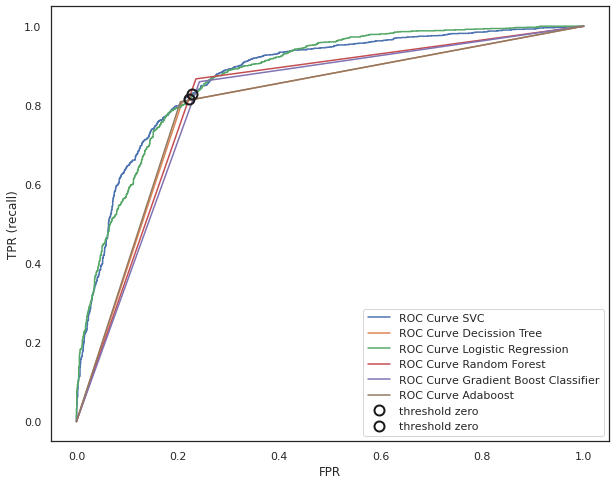

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, grid_sup.decision_function(X_test))
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, logreg.decision_function(X_test))
fpr_grid_tree,      tpr_grid_tree,      thresholds_grid_tree = roc_curve(y_test,pred_tree)
fpr_rfm_grid,  tpr_rfm_grid,  thresholds_rfm_grid = roc_curve(y_test, pred_rfc)
fpr_gbc,  tpr_gbc,  thresholds_gbc = roc_curve(y_test, pred_gbc)
fpr_adb,  tpr_adb,  thresholds_adb = roc_curve(y_test, pred_adb)


plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_grid_tree, tpr_grid_tree, label="ROC Curve Decission Tree")
plt.plot(fpr_logreg, tpr_logreg, label="ROC Curve Logistic Regression")
plt.plot(fpr_rfm_grid, tpr_rfm_grid, label="ROC Curve Random Forest")
plt.plot(fpr_gbc, tpr_gbc, label="ROC Curve Gradient Boost Classifier")
plt.plot(fpr_adb, tpr_adb, label="ROC Curve Adaboost")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)

         
plt.plot(fpr_logreg[close_zero], tpr_logreg[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.show()


## Conclusion

A careful analysis of the confusion matrix and f1-scores of the two models shows that the random forest is the better performing model.